# Dimensionality Reduction

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import umap

/home/icarrara/miniconda3/envs/Env_Igor/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icarrara/miniconda3/envs/Env_Igor/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icarrara/miniconda3/envs/Env_Igor/lib/python3.9/site-pac

In [2]:
%matplotlib inline
sns.set()
sns.set(rc={"figure.figsize": (15, 12)})

In [3]:
RANDOM_STATE = 42

## Defining plotting functions

In [4]:
def plot_2d(x, y, c, title):
    sns.set_style("darkgrid")

    PALETTE = sns.color_palette('deep', n_colors=len(np.unique(c)))
    CMAP = ListedColormap(PALETTE.as_hex())

    plt.scatter(x, y,
        c=c,
        cmap=CMAP,
        s=70)

    plt.title(title, fontsize=20, y=1.03)

    #plt.xlabel(xlabel, fontsize=16)
    #plt.ylabel(ylabel, fontsize=16)
    plt.show()

In [5]:
def plot_3d(x, y, z, c, title):
    sns.set_style('whitegrid')

    PALETTE = sns.color_palette('deep', n_colors=len(np.unique(c)))
    CMAP = ListedColormap(PALETTE.as_hex())

    fig = plt.figure(1, figsize=(15, 12))
    ax = fig.add_subplot(111, projection="3d")

    ax.scatter(x, y, z,
               c=c,
               cmap=CMAP,
               s=40)

    ax.set_title(title, fontsize=20, y=1.03)

    fsize = 14
    #ax.set_xlabel("1st eigenvector", fontsize=fsize)
    #ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    #ax.set_zlabel("3rd eigenvector", fontsize=fsize)

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    plt.show()

## Create Dataset

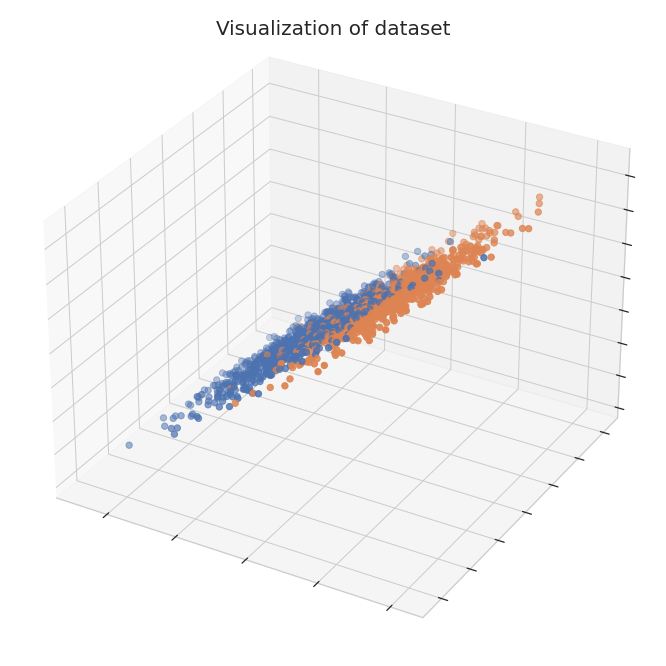

In [6]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_features=6,
    n_classes=2,
    n_samples=1500,
    n_informative=2,
    random_state=42,
    n_clusters_per_class=1,
    )

plot_3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    c=y,
    title = "Visualization of dataset")

### 2D Plotting with PCA

In [7]:
pca = PCA(n_components=2)
points = pca.fit_transform(X)

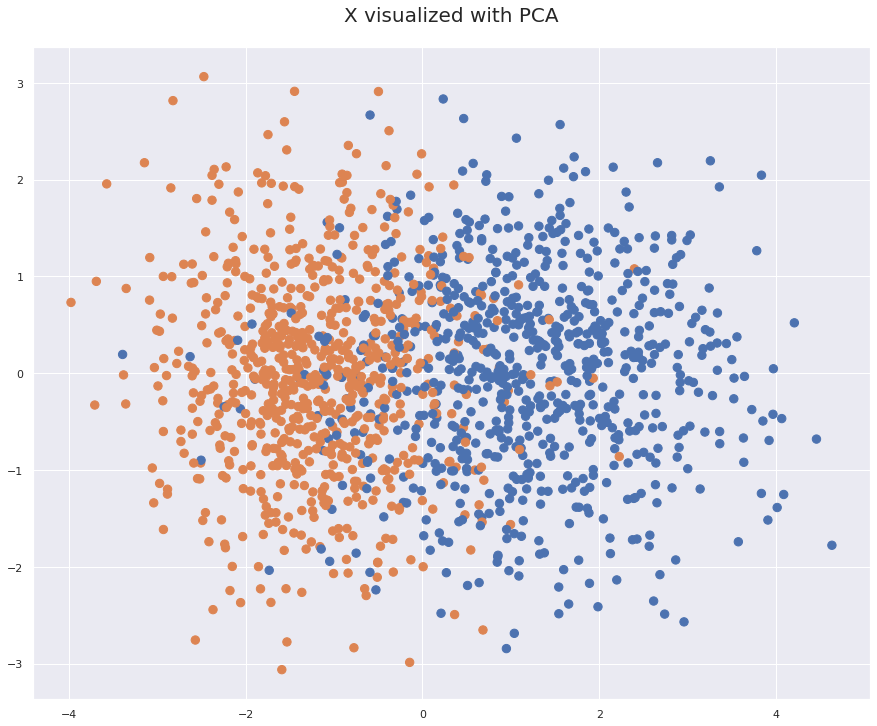

In [8]:
plot_2d(
    x = points[:,0],
    y = points[:,1],
    c = y,
    title = 'X visualized with PCA')

### 2D plotting with t-SNE

#### How to use t-SNE Effectivly
https://distill.pub/2016/misread-tsne/

In [34]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE, perplexity=30)
points = tsne.fit_transform(X)

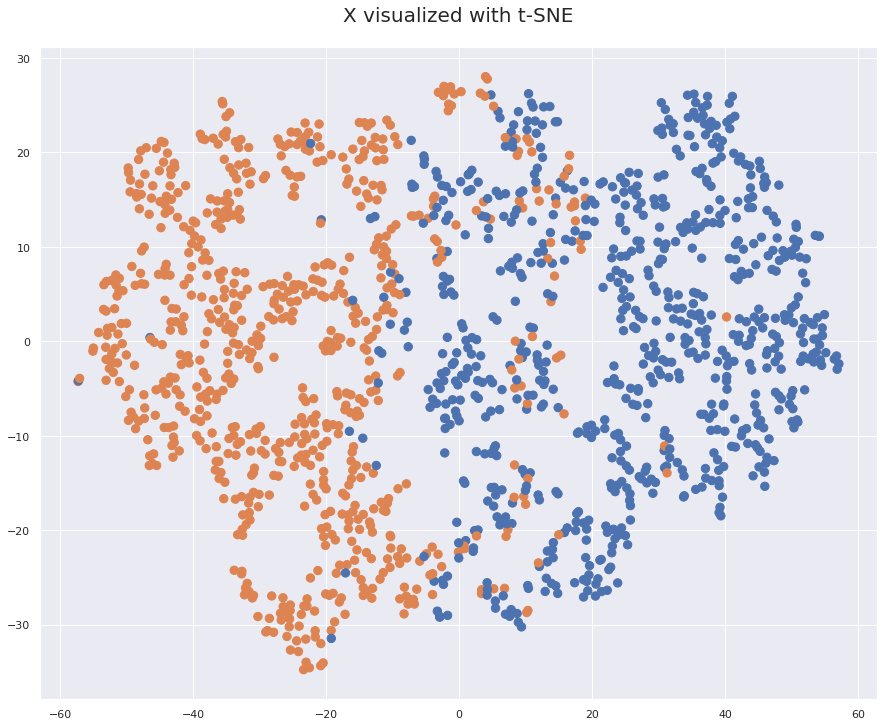

In [35]:
plot_2d(
    x = points[:, 0],
    y = points[:, 1],
    c = y,
    title = 'X visualized with t-SNE')

Kullback-Leibler (KL) divergence between the high-dimensional probability distribution and the low-dimensional probability distribution. Low KL divergence is a sign of better results

In [36]:
tsne.kl_divergence_

1.0633265972137451

### 2D plotting with UMAP

In [37]:
map = umap.UMAP(n_neighbors=10, n_components=2, n_epochs=5000, random_state=RANDOM_STATE)
points = map.fit_transform(X)

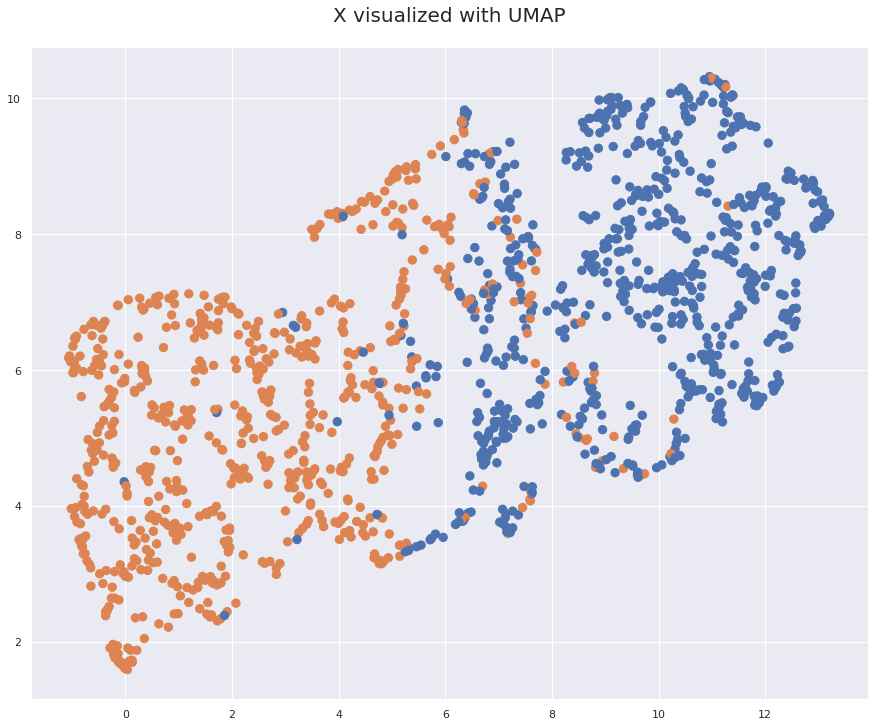

In [38]:
plot_2d(
    x = points[:, 0],
    y = points[:, 1],
    c = y,
    title = 'X visualized with UMAP')

### 3D plotting with PCA

In [39]:
pca = PCA(n_components=3)
points = pca.fit_transform(X)

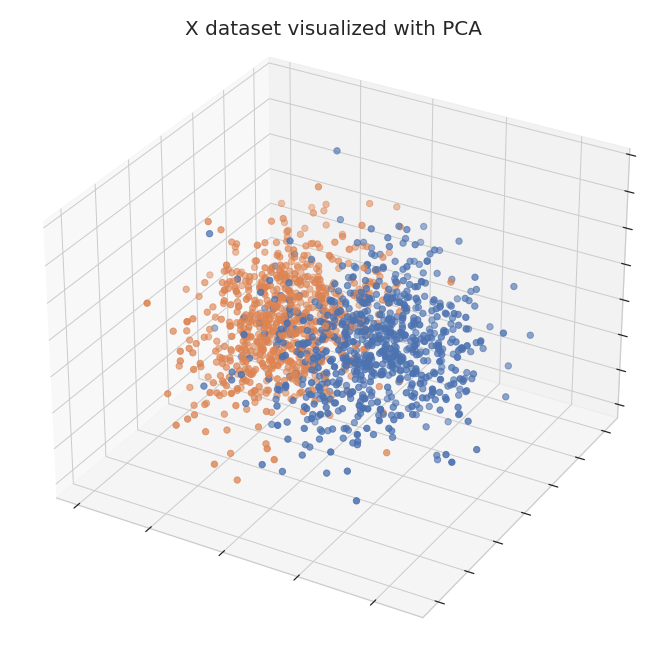

In [40]:
plot_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    c = y,
    title = "X dataset visualized with PCA")

### 3D plotting with t-SNE

In [41]:
tsne = TSNE(n_components=3, n_iter=5000, random_state=RANDOM_STATE, perplexity=30)
points = tsne.fit_transform(X)

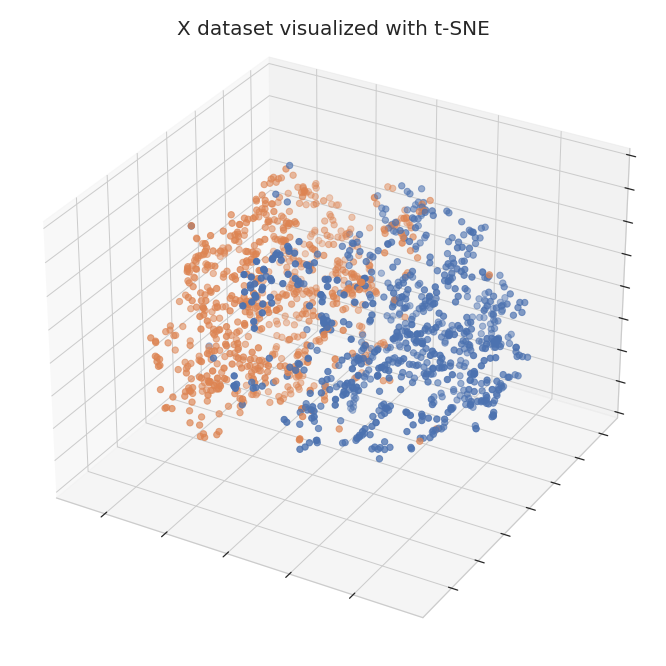

In [42]:
plot_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    c = y,
    title = "X dataset visualized with t-SNE")

### 3D plotting with UMAP

In [43]:
map = umap.UMAP(n_neighbors=30, n_components=3, n_epochs=5000, random_state=RANDOM_STATE)
points = map.fit_transform(X)

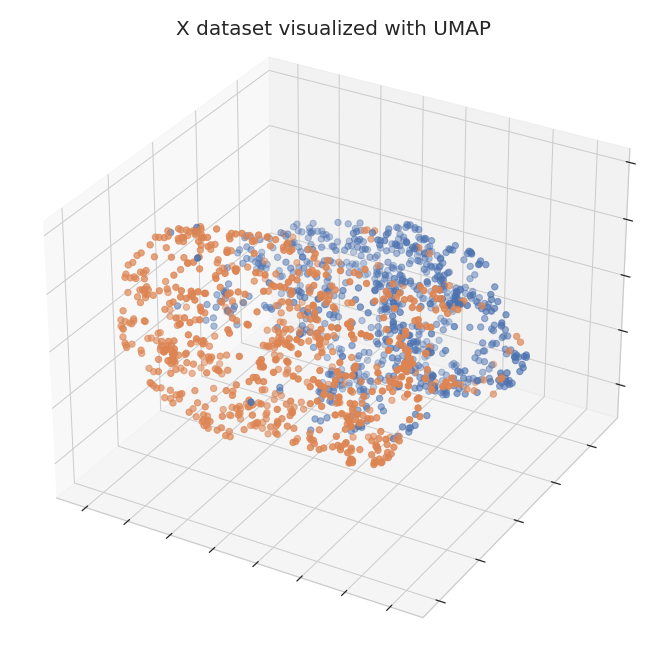

In [44]:
plot_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    c = y,
    title = "X dataset visualized with UMAP")

### Criterion PCA

In [89]:
# If not set all the component are included
pca = PCA()
points = pca.fit_transform(X)

#### Kaiser Criterion

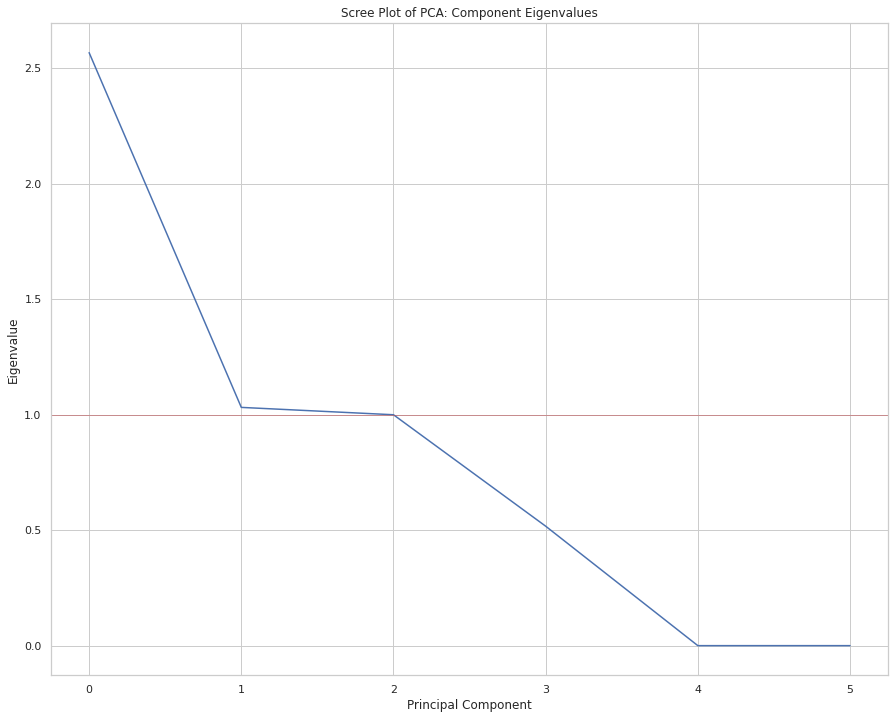

In [90]:
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()

scree_plot()

#### Explained Variance

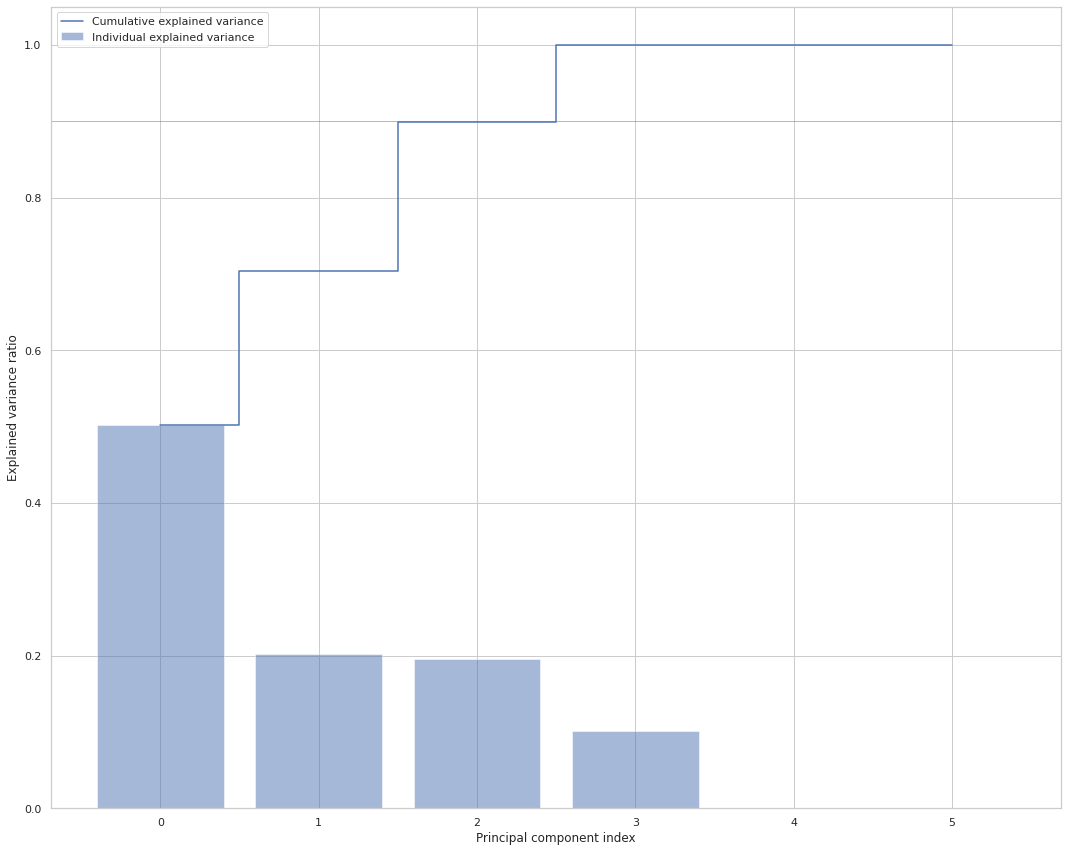

In [92]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.axhline(y=0.9, linewidth=1, color='r', alpha=0.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### t-SNE different level of perplexity

S-curve, perplexity=5 in 0.075 sec
S-curve, perplexity=30 in 0.093 sec
S-curve, perplexity=50 in 0.11 sec
S-curve, perplexity=100 in 0.12 sec


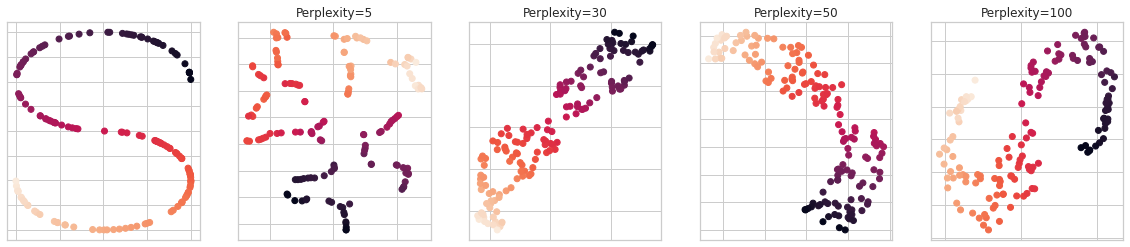

In [87]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import datasets, manifold

n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(1, 5, figsize=(20, 4))
perplexities = [5, 30, 50, 100]

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


## Loading IRIS the dataset

In [45]:
dataset = load_iris()

In [46]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

In [47]:
iris = pd.DataFrame(
    dataset.data,
    columns=features)

In [48]:
iris[target] = dataset.target

In [49]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Plotting first two components

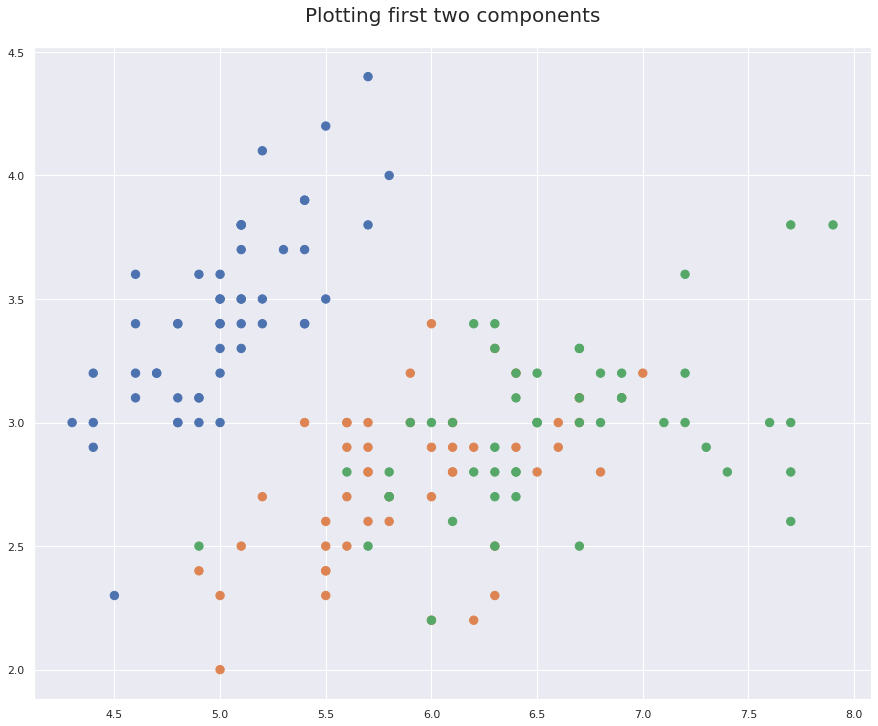

In [50]:
plot_2d(
    x = iris['sepal_length'],
    y = iris['sepal_width'],
    c = iris['species'],
    title = 'Plotting first two components')

### 2D Plotting with PCA

In [51]:
pca = PCA(n_components=2)
points = pca.fit_transform(iris[features])

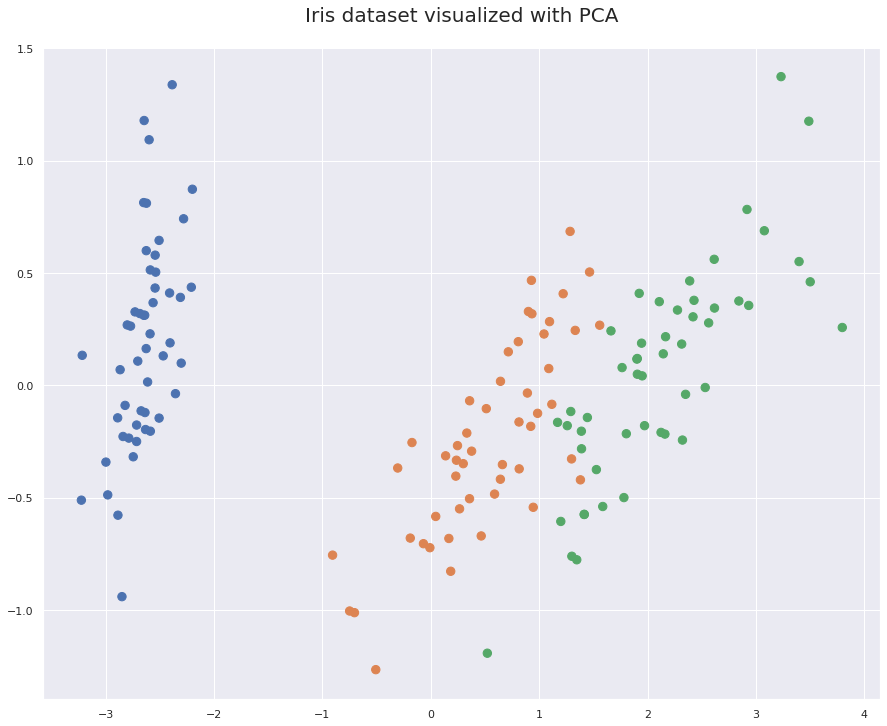

In [52]:
plot_2d(
    x = points[:,0],
    y = points[:,1],
    c = iris['species'],
    title = 'Iris dataset visualized with PCA')

### 2D plotting with t-SNE

In [53]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE, perplexity=30)
points = tsne.fit_transform(iris[features])

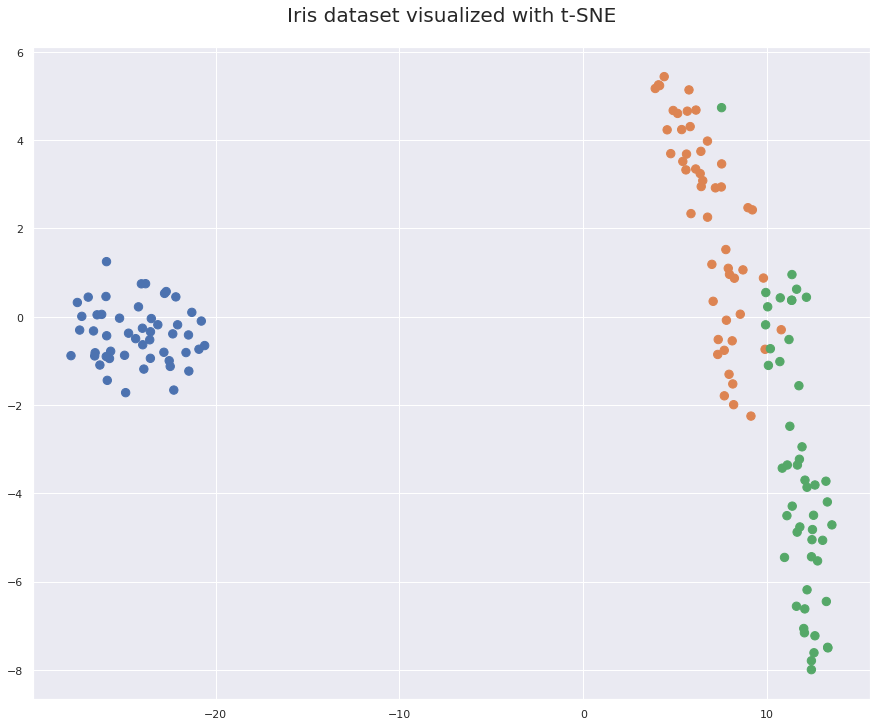

In [54]:
plot_2d(
    x = points[:, 0],
    y = points[:, 1],
    c = iris['species'],
    title = 'Iris dataset visualized with t-SNE')

### 2D plotting with UMAP

In [55]:
map = umap.UMAP(n_neighbors=30, n_components=2, n_epochs=5000, random_state=RANDOM_STATE)
points = map.fit_transform(iris[features])

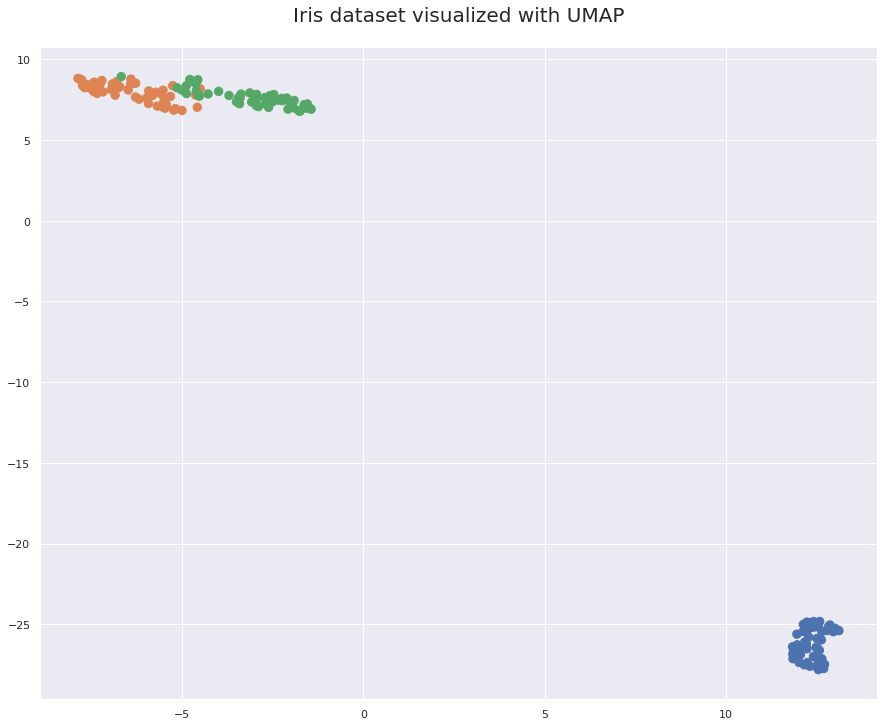

In [56]:
plot_2d(
    x = points[:, 0],
    y = points[:, 1],
    c = iris['species'],
    title = 'Iris dataset visualized with UMAP')

### 3D plotting with PCA

In [57]:
pca = PCA(n_components=3)
points = pca.fit_transform(iris[features])

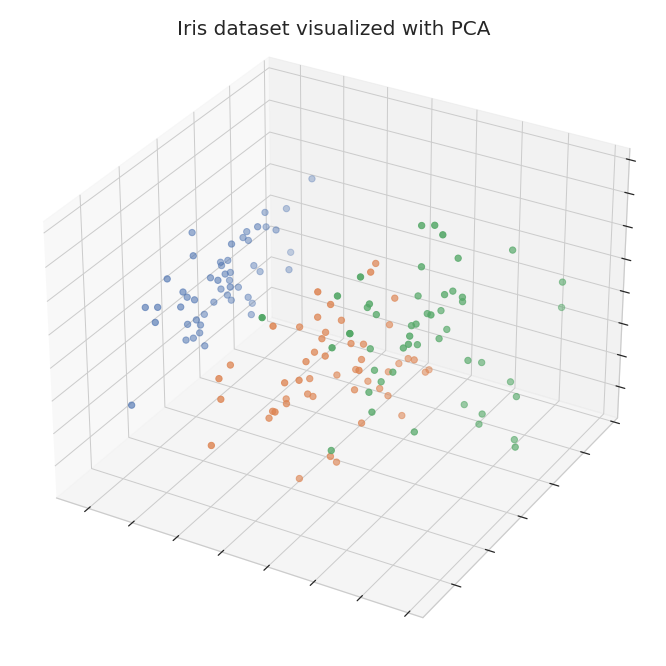

In [58]:
plot_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    c = iris['species'],
    title = "Iris dataset visualized with PCA")

### 3D plotting with t-SNE

In [59]:
tsne = TSNE(n_components=3, n_iter=5000, random_state=RANDOM_STATE, perplexity=30)
points = tsne.fit_transform(iris[features])

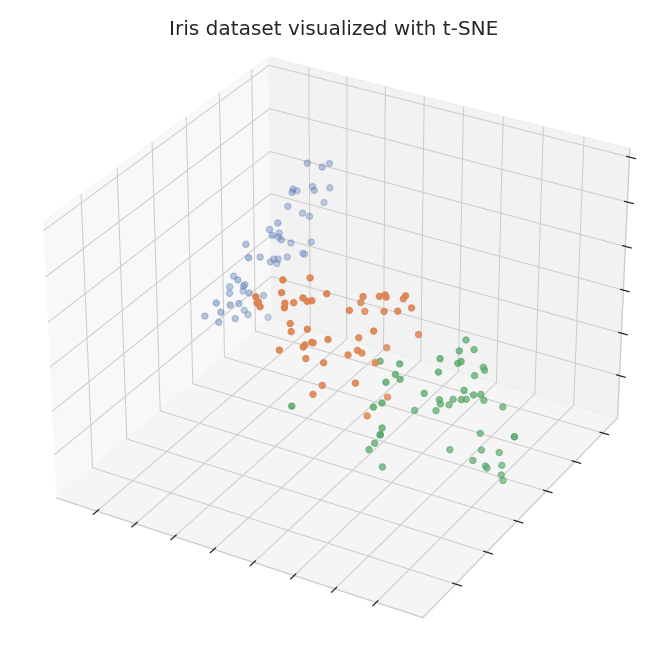

In [60]:
plot_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    c = iris['species'],
    title = "Iris dataset visualized with t-SNE")

### 3D plotting with UMAP

In [61]:
map = umap.UMAP(n_neighbors=30, n_components=3, n_epochs=5000, random_state=RANDOM_STATE)
points = map.fit_transform(iris[features])

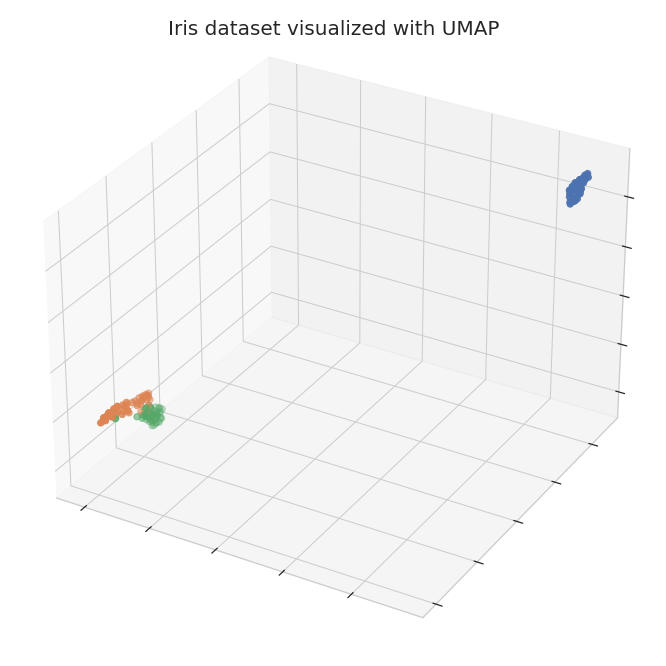

In [62]:
plot_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    c = iris['species'],
    title = "Iris dataset visualized with UMAP")

## Load MNIST Dataset

In [63]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# data from sklearn datasets
X, y = datasets.load_digits(return_X_y=True, as_frame=False, n_class=10)
X = StandardScaler().fit_transform(X)

# Extract data & target from the dataset
y = y.astype(int)

In [64]:
print(X.shape)
print(y.shape)
print(np.unique(y))

(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]


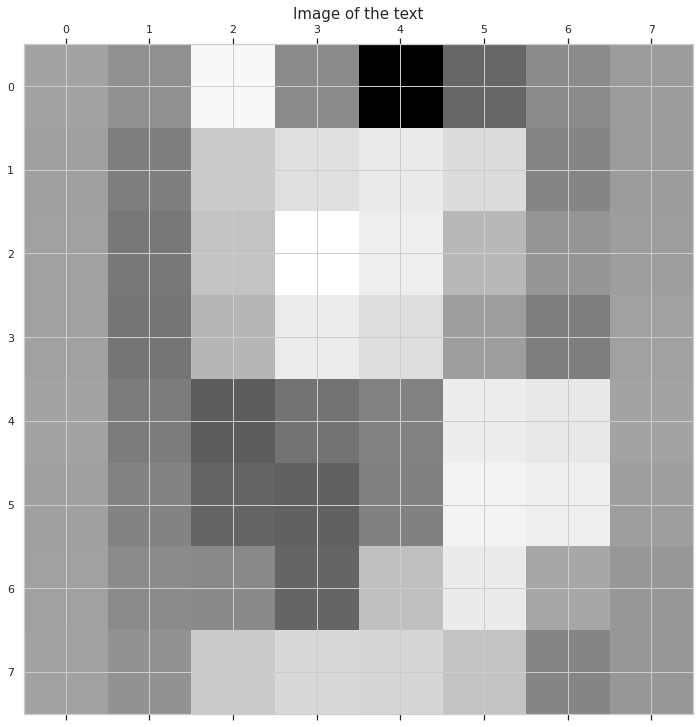

In [65]:
# Reshape the pixel data into 28x28
single_image = X[5, :].reshape(8,8)

plt.matshow(single_image, cmap='gray')
plt.title(f"Image of the text", fontsize=15)
plt.show()

### 2D Plotting with PCA

In [66]:
pca = PCA(n_components=2)
points = pca.fit_transform(X)

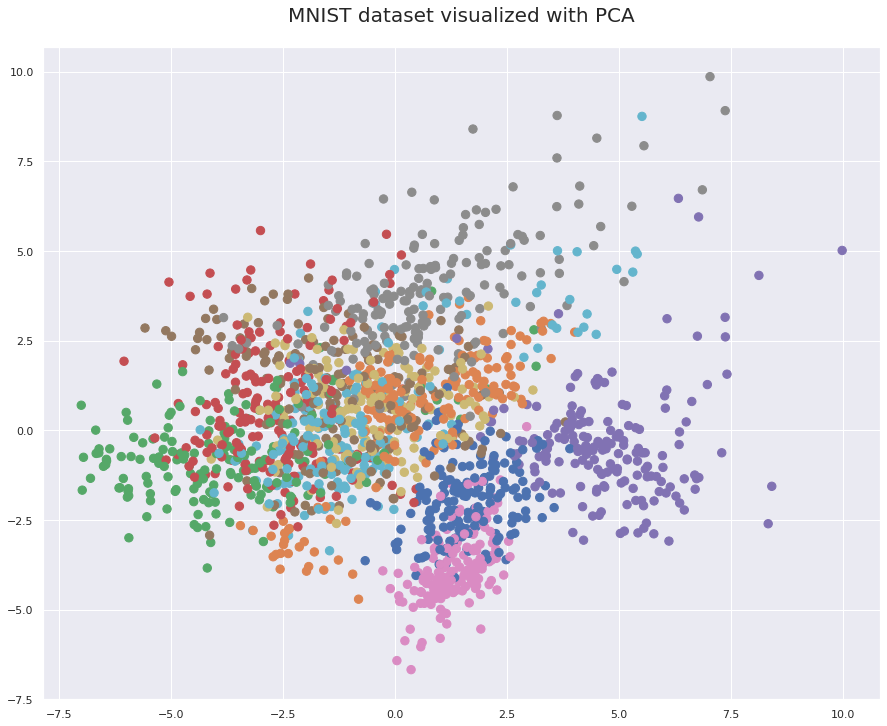

In [67]:
plot_2d(
    x = points[:,0],
    y = points[:,1],
    c = y,
    title = 'MNIST dataset visualized with PCA')

### 2D plotting with t-SNE

In [68]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE, perplexity=30)
points = tsne.fit_transform(X)

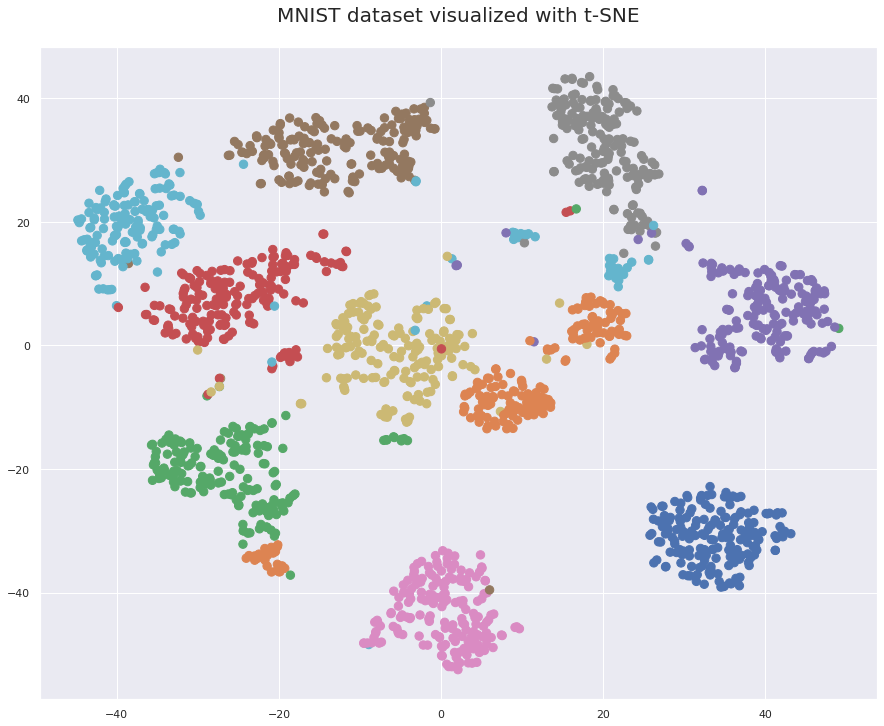

In [69]:
plot_2d(
    x = points[:, 0],
    y = points[:, 1],
    c = y,
    title = 'MNIST dataset visualized with t-SNE')

### 2D plotting with UMAP

In [70]:
map = umap.UMAP(n_neighbors=30, n_components=2, n_epochs=5000, random_state=RANDOM_STATE)
points = map.fit_transform(X)

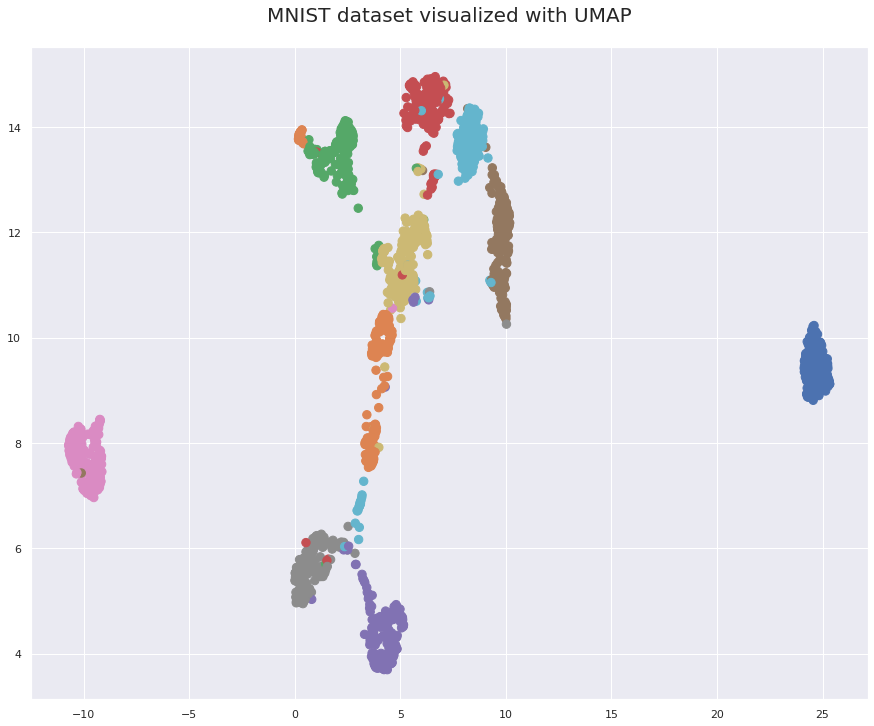

In [71]:
plot_2d(
    x = points[:, 0],
    y = points[:, 1],
    c = y,
    title = 'MNIST dataset visualized with UMAP')

### 3D plotting with PCA

In [72]:
pca = PCA(n_components=3)
points = pca.fit_transform(X)

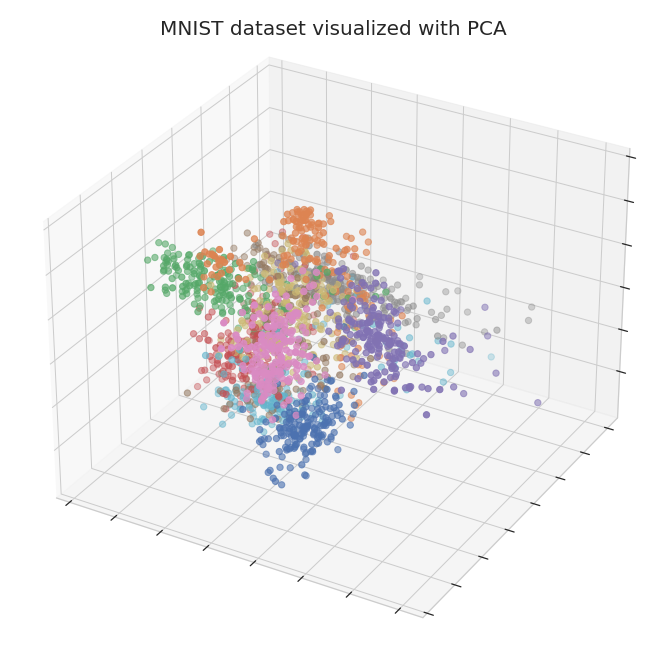

In [73]:
plot_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    c = y,
    title = "MNIST dataset visualized with PCA")

### 3D plotting with t-SNE

In [74]:
tsne = TSNE(n_components=3, n_iter=5000, random_state=RANDOM_STATE, perplexity=30)
points = tsne.fit_transform(X)

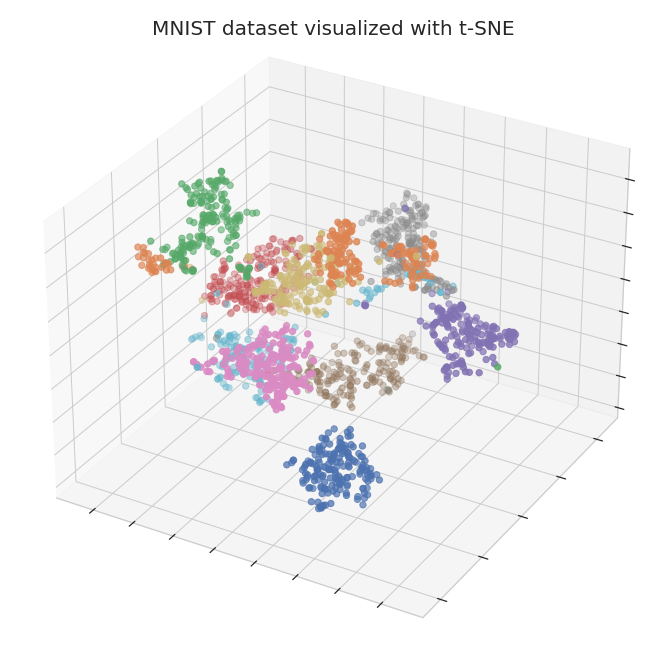

In [75]:
plot_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    c = y,
    title = "MNIST dataset visualized with t-SNE")

### 3D plotting with UMAP

In [76]:
map = umap.UMAP(n_neighbors=30, n_components=3, n_epochs=5000, random_state=RANDOM_STATE)
points = map.fit_transform(X)

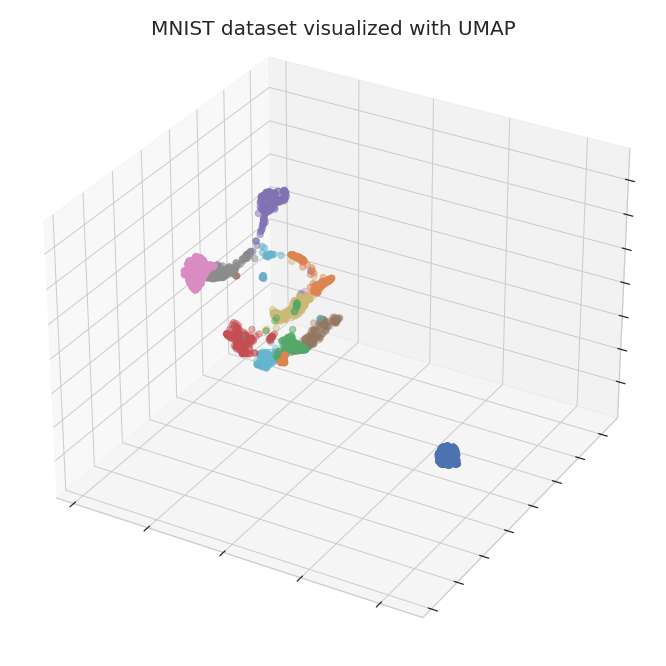

In [77]:
plot_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    c = y,
    title = "MNIST dataset visualized with UMAP")